In [3]:
import tensorflow as tf
from d2l import tensorflow as d2l

tf.random.set_seed(seed=1322)

In [4]:
n_train = 50
x_train = tf.sort(tf.random.uniform(shape=(n_train,), maxval=5))  # x 是 [0,5) 之间均匀分布随机数
x_train.shape

TensorShape([50])

In [5]:
def f(x):
    return 2 * tf.sin(x) + x ** 0.8


y_train = f(x_train) + tf.random.normal((n_train,), 0.0, 0.5)  # 训练样本的输出
x_test = tf.range(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出
n_test = len(x_test)
n_test

50

In [6]:
def plot_kernel_reg(y_hat):
    d2l.plot(x_test, [y_truth, y_hat], 'x', 'y', legend=['Truth', 'Pred'], xlim=[0, 5], ylim=[-1, 5])
    d2l.plt.plot(x_train, y_train, 'o', alpha=0.5)

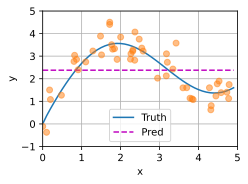

In [7]:
y_hat = tf.repeat(tf.reduce_mean(y_train), repeats=n_test)
plot_kernel_reg(y_hat)

In [9]:
X_repeat = tf.repeat(tf.expand_dims(x_train, axis=0), repeats=n_train, axis=0)
print(X_repeat.shape)

(50, 50)


In [10]:
X_repeat

<tf.Tensor: shape=(50, 50), dtype=float32, numpy=
array([[1.6874075e-03, 9.9952817e-02, 1.7774761e-01, ..., 4.7272196e+00,
        4.7729850e+00, 4.7854233e+00],
       [1.6874075e-03, 9.9952817e-02, 1.7774761e-01, ..., 4.7272196e+00,
        4.7729850e+00, 4.7854233e+00],
       [1.6874075e-03, 9.9952817e-02, 1.7774761e-01, ..., 4.7272196e+00,
        4.7729850e+00, 4.7854233e+00],
       ...,
       [1.6874075e-03, 9.9952817e-02, 1.7774761e-01, ..., 4.7272196e+00,
        4.7729850e+00, 4.7854233e+00],
       [1.6874075e-03, 9.9952817e-02, 1.7774761e-01, ..., 4.7272196e+00,
        4.7729850e+00, 4.7854233e+00],
       [1.6874075e-03, 9.9952817e-02, 1.7774761e-01, ..., 4.7272196e+00,
        4.7729850e+00, 4.7854233e+00]], dtype=float32)>

In [11]:
X = tf.ones((2, 1, 4))
Y = tf.ones((2, 4, 6))
tf.matmul(X, Y).shape

TensorShape([2, 1, 6])

In [ ]:
class NWKernelRegression(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(initial_value=tf.random.uniform)